
# **AVANCE 3**




>**_Importando las librerias_**

In [1]:
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
from scipy.interpolate import make_interp_spline

import plotly.graph_objects as go
import plotly.express as px

>**_Lectura del archivo Datosfinalesfiltrados.csv_**


In [2]:
df_latinoamerica=pd.read_csv(r"C:\Users\flore\OneDrive\Desktop\H\Modulo 4\PI\Datosfinalesfiltrados.csv",sep=",")

**1. Distribución de la Población por Grupo de Edad**

C:\Users\flore\AppData\Local\Temp\ipykernel_11160\379997313.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo_edad', y='poblacion', data=df_age_distribution, palette=colores)


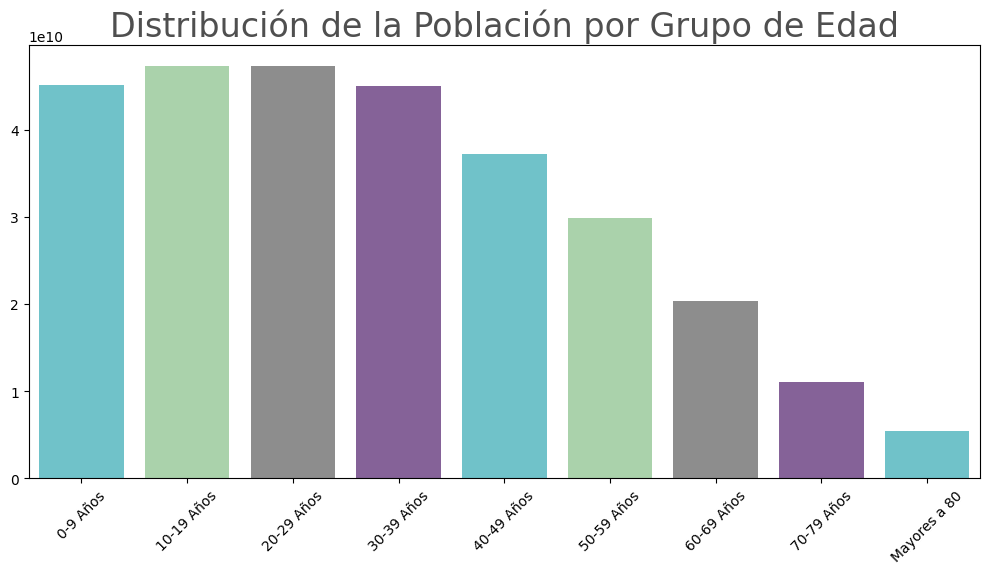

In [3]:
Edades_Agrupadas = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
                    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Crear un DataFrame con la suma de la población por grupo de edad
df_age_distribution = df_latinoamerica[Edades_Agrupadas].sum().reset_index()
df_age_distribution.columns = ['grupo_edad', 'poblacion']

# Mapear los grupos de edad a las etiquetas deseadas
etiquetas = ['0-9 Años', '10-19 Años', '20-29 Años', '30-39 Años', 
             '40-49 Años', '50-59 Años', '60-69 Años', '70-79 Años', 
             'Mayores a 80']
df_age_distribution['grupo_edad'] = etiquetas

# Definir la paleta de colores personalizada
colores = ['#61CED8', '#A3D9A5', '#8D8D8D', '#8759A1', '#61CED8', '#A3D9A5', '#8D8D8D', '#8759A1', '#61CED8']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_edad', y='poblacion', data=df_age_distribution, palette=colores)

# Personalizar el gráfico
plt.title('Distribución de la Población por Grupo de Edad', fontsize=24, color='#4F4F4F')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**2 Tasa de mortalidad por grupo etario**

C:\Users\flore\AppData\Local\Temp\ipykernel_11160\3439172612.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


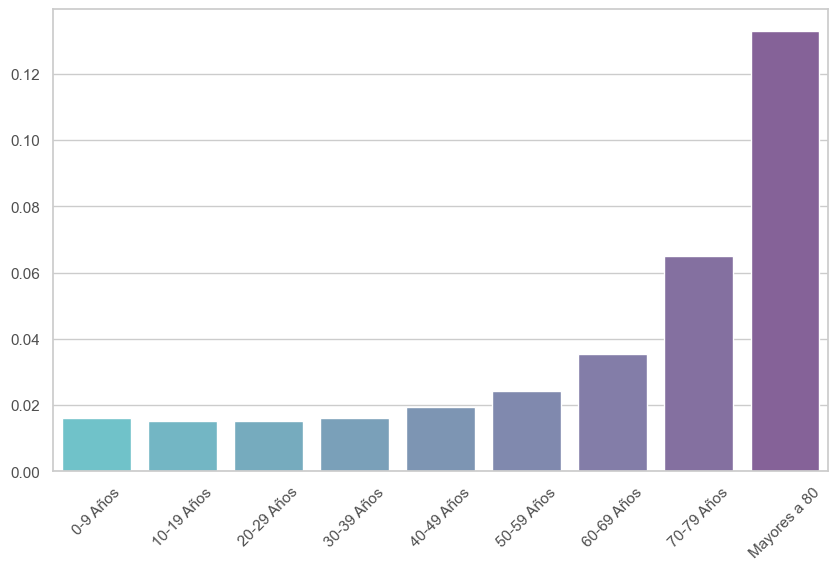

In [ ]:

# Calcular la tasa de mortalidad por grupo etario
fallecidos_edad = []  # Lista vacía para almacenar las tasas de mortalidad por grupo etario
total_fallecidos = df_latinoamerica['cumulative_deceased'].sum()  # Sumar el total de fallecidos acumulados en toda la región

# Iterar sobre cada grupo de edad
for edadg in Edades_Agrupadas:
    total_casos = df_latinoamerica[edadg].sum()  # Sume el total de casos en el grupo de edad actual
    if total_casos > 0:  # Evitar división por cero si no hay casos registrados en un grupo
        tasa_mortalidad = total_fallecidos / total_casos  # Calcular la tasa de mortalidad como fallecidos / casos
    else:
        tasa_mortalidad = 0  # Si no hay casos en el grupo, la tasa de mortalidad es 0
    fallecidos_edad.append(tasa_mortalidad)  # Agregar la tasa calculada a la lista

# Crear un DataFrame con los resultados
df_fallecidos_edad = pd.DataFrame({'Grupo_Edad': Edades_Agrupadas, 'Tasa_Mortalidad': fallecidos_edad})

# Mapear los grupos de edad a etiquetas más descriptivas
etiquetas = ['0-9 Años', '10-19 Años', '20-29 Años', '30-39 Años', 
             '40-49 Años', '50-59 Años', '60-69 Años', '70-79 Años', 
             'Mayores a 80']  
df_fallecidos_edad['Grupo_Edad'] = etiquetas  

# Definir los colores para el gradiente del gráfico
colors = ['#61CED8', '#8759A1']  
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(df_fallecidos_edad))  # Crear el gradiente personalizado

# Asignar colores a cada barra del gráfico con base en el gradiente
gradiente_colores = [cmap(i / (len(df_fallecidos_edad) - 1)) for i in range(len(df_fallecidos_edad))]

# Crear el gráfico de barras
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
bar_plot = sns.barplot(
    x='Grupo_Edad',  # Eje X los grupos de edad
    y='Tasa_Mortalidad',  # Eje Y: la tasa de mortalidad
    data=df_fallecidos_edad,  # Usar el DataFrame con los datos calculados
    palette=gradiente_colores  # Aplicar el gradiente de colores al gráfico
)

# Personalizar el gráfico
bar_plot.set_title(None)  # Eliminar el título del gráfico
bar_plot.set_xlabel(None)  # Eliminar la etiqueta del eje X
bar_plot.set_ylabel(None)  # Eliminar la etiqueta del eje Y
bar_plot.tick_params(axis='x', colors='#4F4F4F', rotation=45)  # Configurar el color y la rotación de las etiquetas del eje X
bar_plot.tick_params(axis='y', colors='#4F4F4F')  # Configurar el color de las etiquetas del eje Y

xaxis_title = None  # No incluir título en el eje X
yaxis_title = None  # No incluir título en el eje Y
xaxis = dict(tickfont=dict(color='#4F4F4F'))  # Configurar el color de la fuente en el eje X


Las tasas de mortalidad están expresadas como proporciones (por ejemplo, 0.015997 significa que aproximadamente 1.6% de los casos en el grupo de edad de 0-9 años resultaron en fallecimientos).
La tasa de mortalidad más alta es para el grupo de 80 años y más (0.132862), sig. el 13.3% de los casos en este grupo resultaron en fallecimientos, 

In [15]:
df_fallecidos_edad

,Grupo_Edad,Tasa_Mortalidad
0,0-9 Años,0.015997
1,10-19 Años,0.015266
2,20-29 Años,0.015239
3,30-39 Años,0.016042
4,40-49 Años,0.019422
5,50-59 Años,0.024133
6,60-69 Años,0.035446
7,70-79 Años,0.065064
8,Mayores a 80,0.132862


**3 Tasa de casos confirmados por grupo etario**

C:\Users\flore\AppData\Local\Temp\ipykernel_11160\3844854102.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


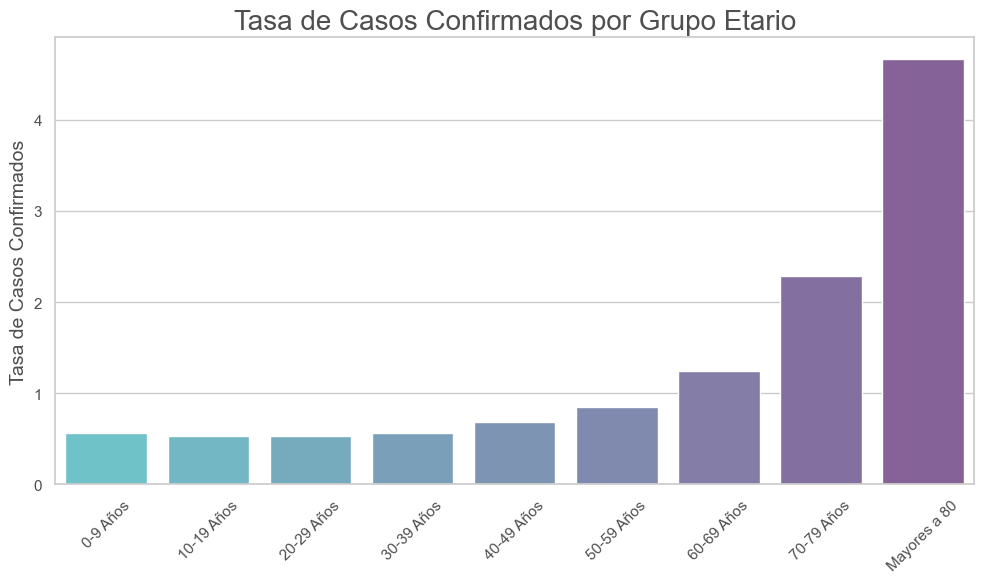

In [19]:
# Crear una lista vacía para almacenar las tasas de casos confirmados
casos_confirmados_edad = []

# Iterar sobre los grupos de edad
for edadg in Edades_Agrupadas:
    # Calcular la tasa de casos confirmados por grupo etario
    total_casos_confirmados = df_latinoamerica['cumulative_confirmed'].sum()  # Total de casos confirmados
    total_poblacion = df_latinoamerica[edadg].sum()  # Total de población en el grupo de edad actual
    
    if total_poblacion > 0:  # Evitar división por cero
        tasa_casos_confirmados = total_casos_confirmados / total_poblacion  # Tasa de casos confirmados
    else:
        tasa_casos_confirmados = 0  # Si no hay población, la tasa es 0
    
    casos_confirmados_edad.append(tasa_casos_confirmados)  # Almacenar la tasa en la lista

# Crear DataFrame con el resultado
df_casos_confirmados_edad = pd.DataFrame({'Grupo_Edad': Edades_Agrupadas, 'Tasa_Casos_Confirmados': casos_confirmados_edad})

# Mapear los grupos de edad a etiquetas más descriptivas
etiquetas = ['0-9 Años', '10-19 Años', '20-29 Años', '30-39 Años', 
             '40-49 Años', '50-59 Años', '60-69 Años', '70-79 Años', 
             'Mayores a 80']
df_casos_confirmados_edad['Grupo_Edad'] = etiquetas

# Crear un gradiente de colores para las barras
colors = ['#61CED8', '#8759A1']
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(df_casos_confirmados_edad))

# Asignar colores a cada barra con base en el gradiente
gradiente_colores = [cmap(i / (len(df_casos_confirmados_edad) - 1)) for i in range(len(df_casos_confirmados_edad))]

# Crear el gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='Grupo_Edad', 
    y='Tasa_Casos_Confirmados', 
    data=df_casos_confirmados_edad,
    palette=gradiente_colores
)

# Personalizar el gráfico
bar_plot.set_title('Tasa de Casos Confirmados por Grupo Etario', fontsize=20, color='#4F4F4F')
bar_plot.set_xlabel(None)
bar_plot.set_ylabel('Tasa de Casos Confirmados', fontsize=14, color='#4F4F4F')
bar_plot.tick_params(axis='x', colors='#4F4F4F', rotation=45)
bar_plot.tick_params(axis='y', colors='#4F4F4F')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
print(f"casos_confirmados: {df_casos_confirmados_edad * 100 }")


casos_confirmados:                                           Grupo_Edad  Tasa_Casos_Confirmados
0  0-9 Años0-9 Años0-9 Años0-9 Años0-9 Años0-9 Añ...               56.211492
1  10-19 Años10-19 Años10-19 Años10-19 Años10-19 ...               53.641055
2  20-29 Años20-29 Años20-29 Años20-29 Años20-29 ...               53.548018
3  30-39 Años30-39 Años30-39 Años30-39 Años30-39 ...               56.368334
4  40-49 Años40-49 Años40-49 Años40-49 Años40-49 ...               68.244672
5  50-59 Años50-59 Años50-59 Años50-59 Años50-59 ...               84.800185
6  60-69 Años60-69 Años60-69 Años60-69 Años60-69 ...              124.551508
7  70-79 Años70-79 Años70-79 Años70-79 Años70-79 ...              228.626959
8  Mayores a 80Mayores a 80Mayores a 80Mayores a ...              466.860129%


**4. Casos Confirmados por Mes en Latinoamérica**

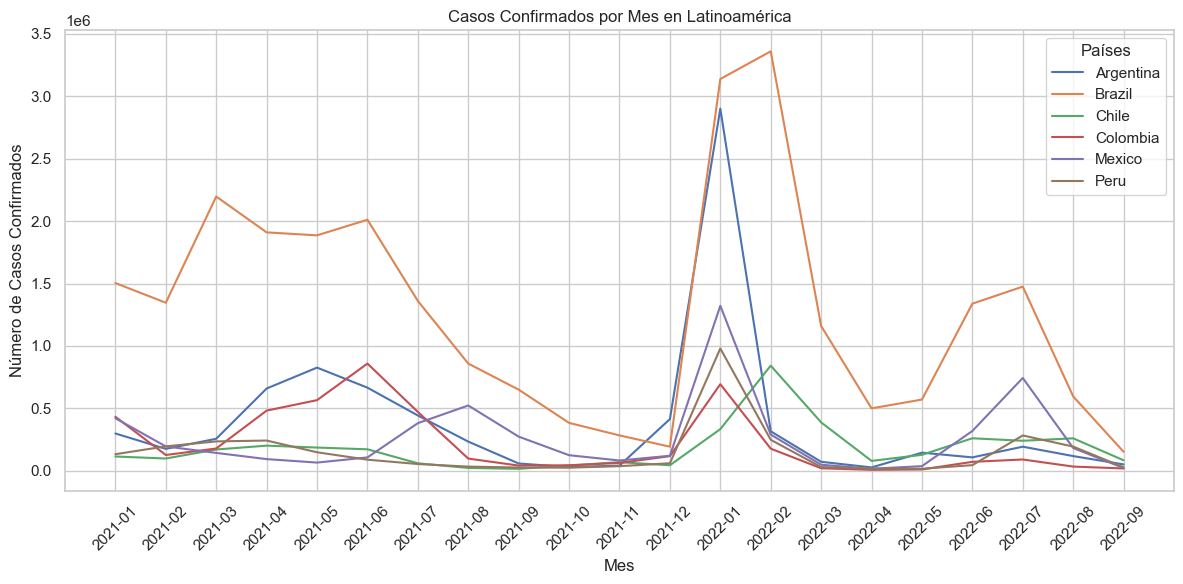

In [23]:
# Modifique que en la columna 'date' esté en formato datetime
df_latinoamerica['date'] = pd.to_datetime(df_latinoamerica['date'], errors='coerce')

# Cree la columna de mes (formato YYYY-MM)
df_latinoamerica['Mes'] = df_latinoamerica['date'].dt.to_period('M')

# Agrupar por mes y país
grouped = df_latinoamerica.groupby(['Mes', 'country_name']).agg({'new_confirmed': 'sum', 'new_deceased': 'sum'}).reset_index()

# Graficar casos confirmados
plt.figure(figsize=(12, 6))

for country in grouped['country_name'].unique():
    country_data = grouped[grouped['country_name'] == country]
    plt.plot(country_data['Mes'].astype(str), country_data['new_confirmed'], label=country)

# Personalizar gráfico
plt.title('Casos Confirmados por Mes en Latinoamérica')
plt.xlabel('Mes')
plt.ylabel('Número de Casos Confirmados')
plt.xticks(rotation=45)
plt.legend(title='Países')
plt.tight_layout()
plt.show()


**Total de Casos Confirmados y Fallecidos por Día de la Semana**

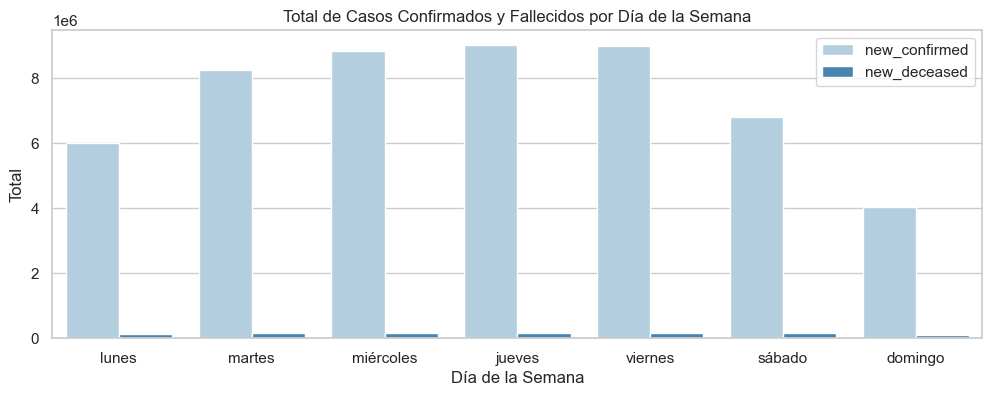

In [24]:
# Extraer el día de la semana en español
df_latinoamerica['Diasemana'] = df_latinoamerica['date'].dt.day_name(locale='es_ES')  # Establecer localización en español para extraer el día de la semana

# Convertir los valores de 'Diasemana' a minúsculas
df_latinoamerica['Diasemana'] = df_latinoamerica['Diasemana'].str.lower()  # Aseguramos que todos los días estén en minúsculas para evitar inconsistencias

# Agrupar por día de la semana y sumar los casos confirmados y fallecidos
resultados = df_latinoamerica.groupby('Diasemana')[['new_confirmed', 'new_deceased']].sum().reset_index()  
# Usamos groupby para agrupar por días de la semana y sumamos las nuevas infecciones y muertes en esos días

# Ordenar los días de la semana en español (en minúsculas)
dias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
# Definimos un orden específico para los días de la semana
resultados['Diasemana'] = pd.Categorical(resultados['Diasemana'], categories=dias_ordenados, ordered=True)  # Establecemos el orden para los días
resultados = resultados.sort_values('Diasemana')  # Ordenamos los resultados según el orden de los días de la semana

# Transformación para seaborn
resultados_melted = resultados.melt(id_vars='Diasemana', value_vars=['new_confirmed', 'new_deceased'], 
                                     var_name='Tipo', value_name='Total')  
# Hacemos un "melt" de los datos para que seaborn pueda manejar correctamente los dos tipos de datos (casos confirmados y fallecidos)

# Crear el gráfico
plt.figure(figsize=(12, 4))  # Configuramos el tamaño de la figura
sns.barplot(data=resultados_melted, x='Diasemana', y='Total', hue='Tipo', palette='Blues')  
# Creamos el gráfico de barras, usando la paleta de colores 'Blues' para los tonos azules, también podría ser 'Purples' para lilas

# Etiquetas y título
plt.xlabel('Día de la Semana')  # Etiqueta del eje X
plt.ylabel('Total')  # Etiqueta del eje Y
plt.title('Total de Casos Confirmados y Fallecidos por Día de la Semana')  # Título del gráfico

# Personalizar la leyenda
plt.legend()  # Añadimos la leyenda para diferenciar los tipos de datos (confirmados y fallecidos)

# Mostrar el gráfico
plt.show()  # Mostramos el gráfico resultante


In [26]:
print(resultados)


   Diasemana  new_confirmed  new_deceased
2      lunes   6.011423e+06      124633.0
3     martes   8.258802e+06      161423.0
4  miércoles   8.839890e+06      162699.0
1     jueves   9.028375e+06      167258.0
6    viernes   8.995207e+06      159047.0
5     sábado   6.801514e+06      149945.0
0    domingo   4.043724e+06      110701.0


Version plotly

**5. Total Estimado de Fallecimientos por Género y País**



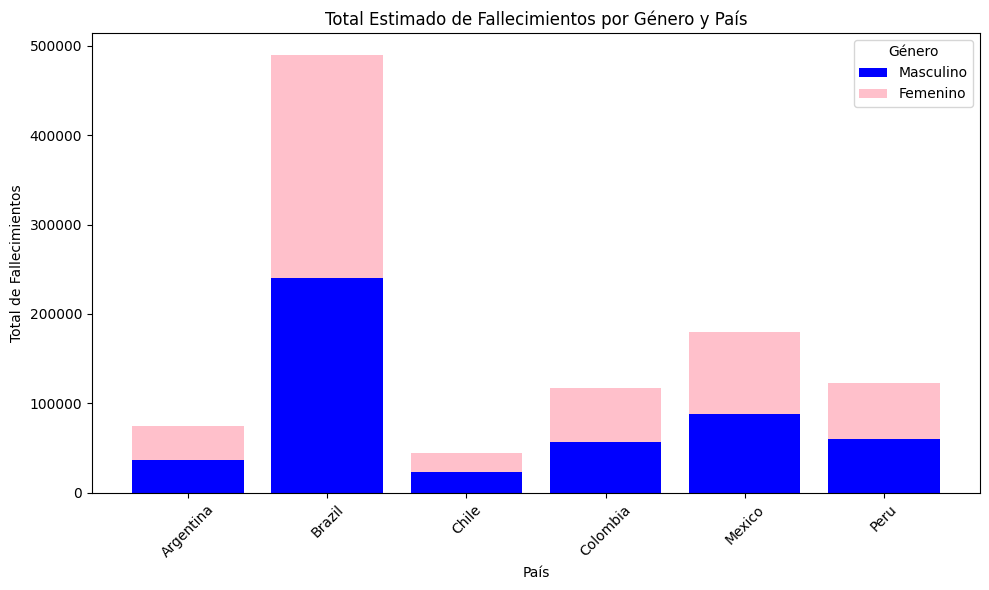

In [5]:
# Calcular proporciones
proporcion_masculina = df_latinoamerica['population_male'] / df_latinoamerica['population']
proporcion_femenina = df_latinoamerica['population_female'] / df_latinoamerica['population']

# Estimar fallecimientos
df_latinoamerica['fallecidos_masculinos'] = df_latinoamerica['new_deceased'] * proporcion_masculina
df_latinoamerica['fallecidos_femeninos'] = df_latinoamerica['new_deceased'] * proporcion_femenina

# Agrupar por país
fallecidos_masculinos = df_latinoamerica.groupby('country_name')['fallecidos_masculinos'].sum()
fallecidos_femeninos = df_latinoamerica.groupby('country_name')['fallecidos_femeninos'].sum()

# Crear DataFrame para barras
df_barras = pd.DataFrame({
    'País': fallecidos_masculinos.index,
    'Fallecidos Masculinos': fallecidos_masculinos.values,
    'Fallecidos Femeninos': fallecidos_femeninos.values
})

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(df_barras['País'], df_barras['Fallecidos Masculinos'], label='Masculino', color='blue')
plt.bar(df_barras['País'], df_barras['Fallecidos Femeninos'], 
        bottom=df_barras['Fallecidos Masculinos'], label='Femenino', color='pink')

# Personalización del gráfico
plt.title('Total Estimado de Fallecimientos por Género y País')
plt.xlabel('País')
plt.ylabel('Total de Fallecimientos')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [9]:
df_barras

,País,Fallecidos Masculinos,Fallecidos Femeninos
0,Argentina,36469.302666,38467.188383
1,Brazil,240718.860163,249219.139837
2,Chile,22891.037616,21946.962384
3,Colombia,57324.736325,59421.263675
4,Mexico,87907.185735,92115.552859
5,Peru,60186.150295,62186.849705


**6. Nuevos Casos y Temperatura Promedio**

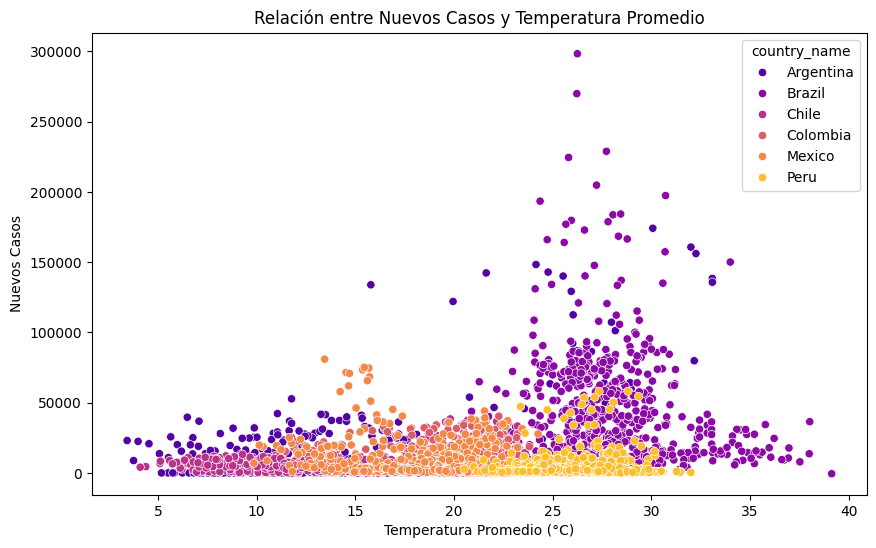

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_latinoamerica, 
    x='average_temperature_celsius',
    y='new_confirmed', 
    hue='country_name',
    palette='plasma')

plt.title('Relación entre Nuevos Casos y Temperatura Promedio')
plt.xlabel('Temperatura Promedio (°C)')
plt.ylabel('Nuevos Casos')
plt.show()


**5. Variación Mensual de Casos y Muertes**



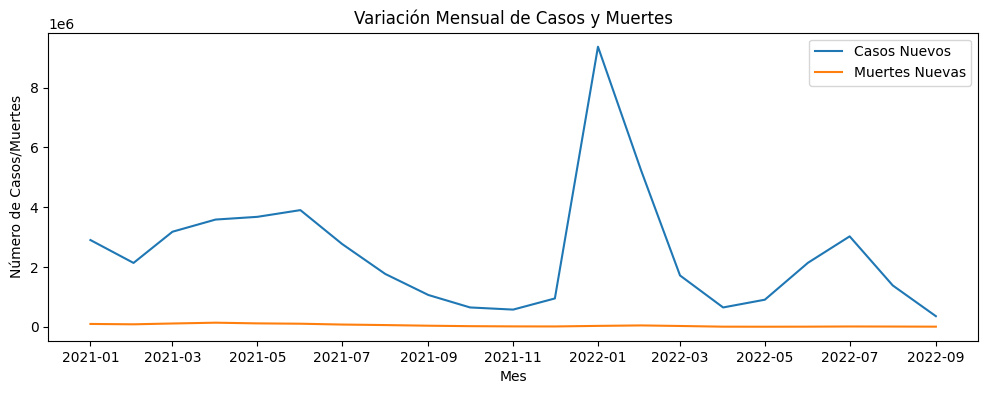

In [7]:
variacion_mensual = df_latinoamerica.groupby('Mes')[['new_confirmed', 'new_deceased']].sum().reset_index()
variacion_mensual['Mes'] = variacion_mensual['Mes'].dt.to_timestamp()

plt.figure(figsize=(12, 4))
sns.lineplot(data=variacion_mensual, x='Mes', y='new_confirmed', label='Casos Nuevos')
sns.lineplot(data=variacion_mensual, x='Mes', y='new_deceased', label='Muertes Nuevas')

plt.title('Variación Mensual de Casos y Muertes')
plt.xlabel('Mes')
plt.ylabel('Número de Casos/Muertes')
plt.legend()
plt.show()


**Total de Casos Confirmados y Fallecidos por Día de la Semana**

In [ ]:
# Extraer el día de la semana en español
df_latinoamerica['Diasemana'] = df_latinoamerica['date'].dt.day_name(locale='es_ES')  # Establecer localización en español

# Convertir los valores de 'Diasemana' a minúsculas
df_latinoamerica['Diasemana'] = df_latinoamerica['Diasemana'].str.lower()

# Agrupar por día de la semana y sumar los casos confirmados y fallecidos
resultados = df_latinoamerica.groupby('Diasemana')[['new_confirmed', 'new_deceased']].sum().reset_index()

# Ordenar los días de la semana en español (en minúsculas)
dias_ordenados = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
resultados['Diasemana'] = pd.Categorical(resultados['Diasemana'], categories=dias_ordenados, ordered=True)
resultados = resultados.sort_values('Diasemana')

# Transformación para seaborn
resultados_melted = resultados.melt(id_vars='Diasemana', value_vars=['new_confirmed', 'new_deceased'], 
                                     var_name='Tipo', value_name='Total')
# Crear el gráfico
plt.figure(figsize=(12, 4))
sns.barplot(data=resultados_melted, x='Diasemana', y='Total', hue='Tipo', palette='plasma')

# Etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Total')
plt.title('Total de Casos Confirmados y Fallecidos por Día de la Semana')
# Personalizar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

**6.Evolución Anual de Casos Nuevos**

C:\Users\flore\AppData\Local\Temp\ipykernel_11160\2746372707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=evolucion_anual, x='Año', y='new_confirmed', palette='plasma')


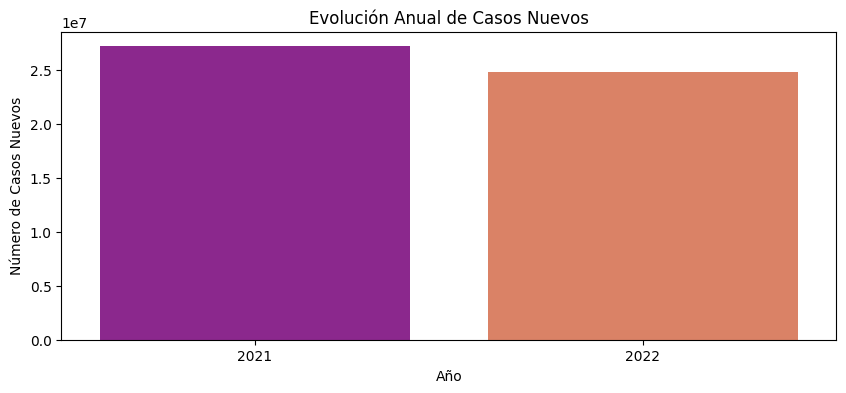

In [10]:
df_latinoamerica['Año'] = df_latinoamerica['date'].dt.year
evolucion_anual = df_latinoamerica.groupby('Año')['new_confirmed'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=evolucion_anual, x='Año', y='new_confirmed', palette='plasma')
plt.title('Evolución Anual de Casos Nuevos')
plt.xlabel('Año')
plt.ylabel('Número de Casos Nuevos')
plt.show()

**Análisis Temporal de la Mortalidad**


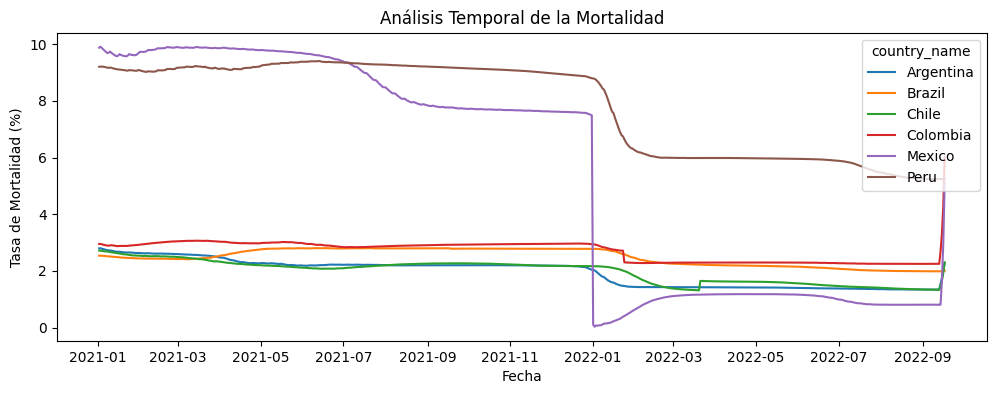

In [11]:
df_latinoamerica['mortality_rate'] = (df_latinoamerica['cumulative_deceased'] / df_latinoamerica['cumulative_confirmed']) * 100

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_latinoamerica, x='date', y='mortality_rate', hue='country_name')
plt.title('Análisis Temporal de la Mortalidad')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad (%)')
plt.show()

**6. Mapa Coroplético para Casos Confirmados**

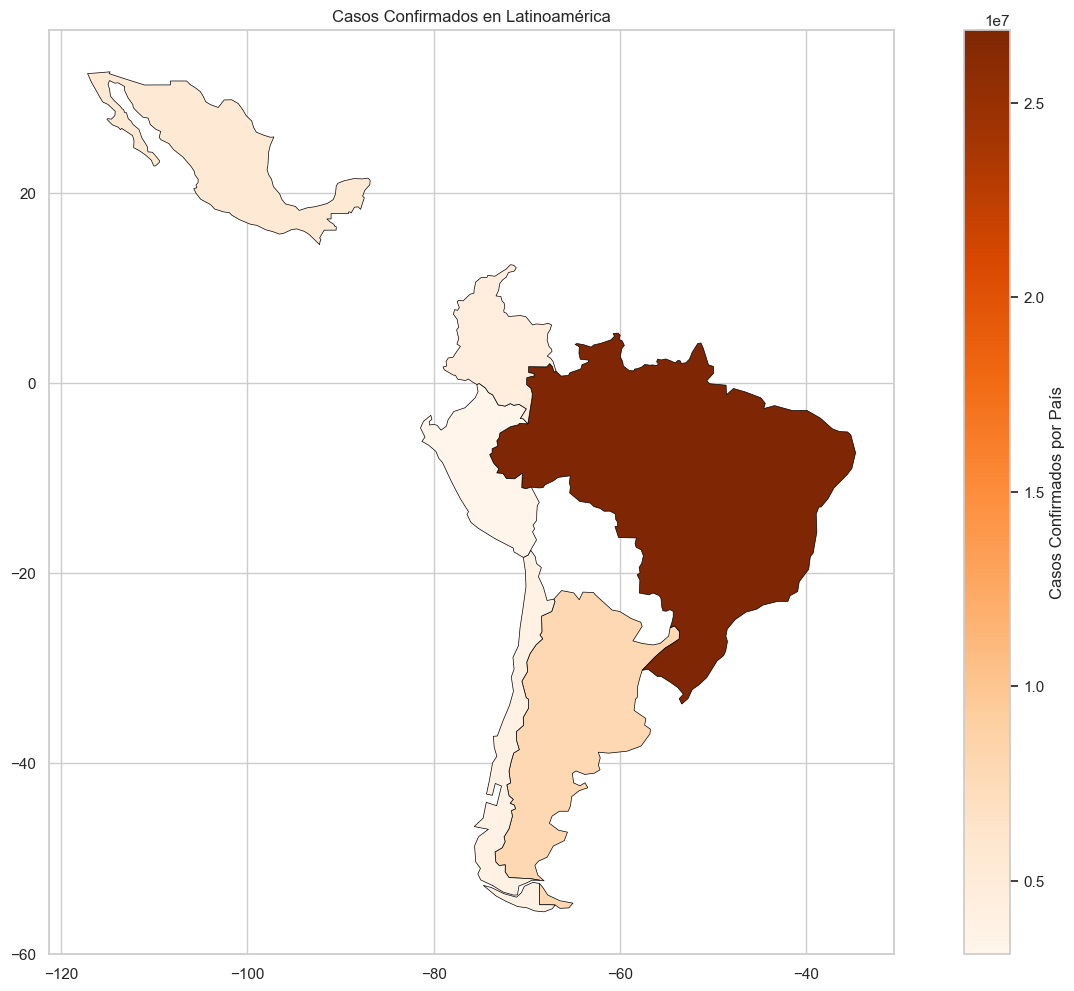

In [33]:

# Crear una paleta personalizada en tonos naranjas
custom_orange_palette = LinearSegmentedColormap.from_list(
    "CustomOrange", 
    ["#FFB77B", "#FFA54F", "#FF7F00", "#CC5801", "#B25905"]  # Tonos de naranja
)

# Cargar el GeoDataFrame desde el archivo shapefile de Natural Earth
world = gpd.read_file(r'C:\Users\flore\OneDrive\Desktop\H\Modulo 4\PI\ne_110m_admin_0_countries (2)\ne_110m_admin_0_countries.shp')

# Filtrar países de Latinoamérica
latinoamerica_countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
latinoamerica = world[world['ADMIN'].isin(latinoamerica_countries)]

# Agrupar datos por país
df_grouped = df_latinoamerica.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum'
}).reset_index()

# Merge
merged = latinoamerica.merge(df_grouped, left_on='ADMIN', right_on='country_name', how='left')

# Configurar figura
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

# Graficar
merged.plot(column='new_confirmed', ax=ax, legend=True,
            legend_kwds={'label': "Casos Confirmados por País", 'orientation': "vertical"},
            cmap='Oranges', edgecolor='black', linewidth=0.5)

plt.title('Casos Confirmados en Latinoamérica')
plt.show()


C:\Users\flore\AppData\Local\Temp\ipykernel_11160\2688903908.py:43: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




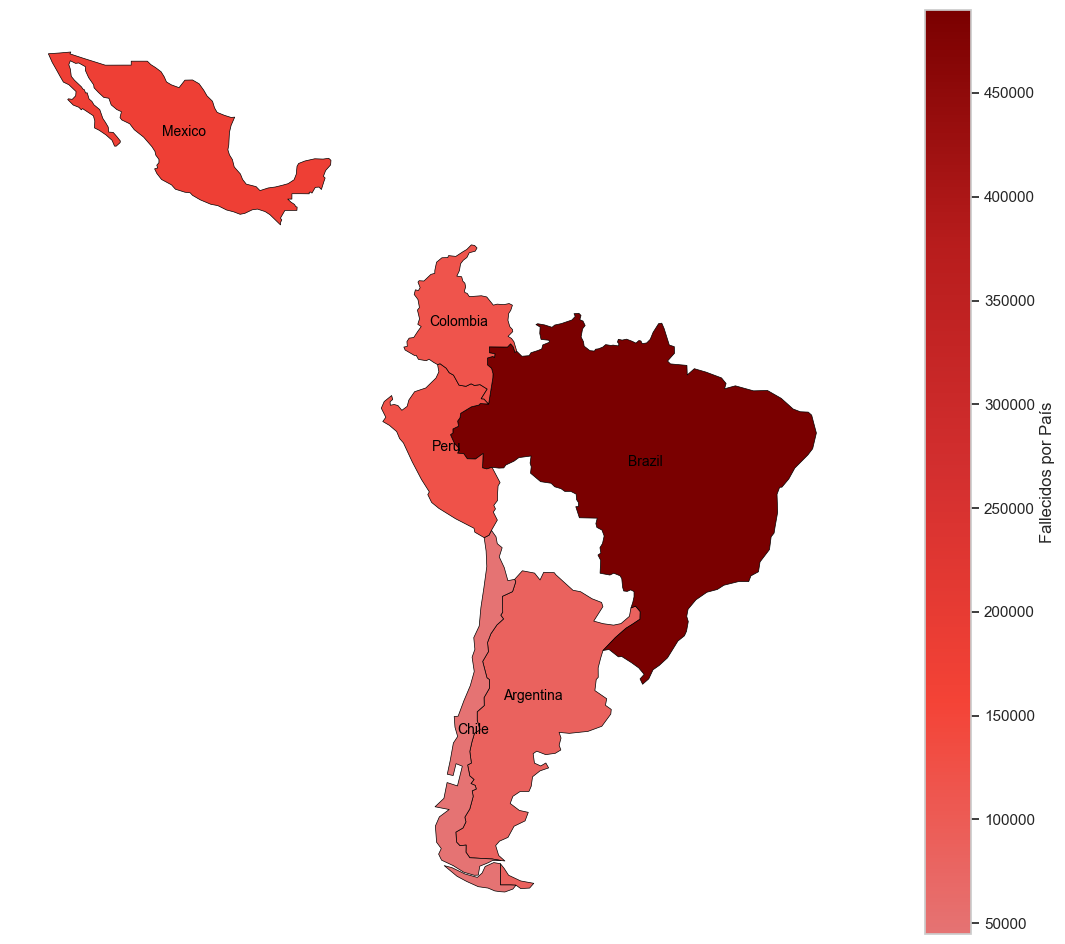

In [36]:

# Crear una paleta personalizada en tonos rojos
custom_red_palette = LinearSegmentedColormap.from_list(
    "CustomRed",
    ["#E57373", "#F44336", "#D32F2F", "#B71C1C", "#7A0000"]  # Tonos de rojo
)


# Filtrar los países de Latinoamérica
latinoamerica_countries = [
    'Argentina', 'Brazil', 'Chile', 'Colombia', 
    'Mexico', 'Peru'
]

# Filtrar el GeoDataFrame para incluir solo los países de Latinoamérica
latinoamerica = world[world['ADMIN'].isin(latinoamerica_countries)]

# Agrupar tus datos por país y sumar los casos confirmados y fallecidos
# Asegúrate de que df_latinoamerica esté definido y contenga las columnas necesarias
df_grouped = df_latinoamerica.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum'
}).reset_index()

# Unir el GeoDataFrame con el DataFrame agrupado
merged = latinoamerica.merge(df_grouped, left_on='ADMIN', right_on='country_name', how='left')

# Configuración de la figura para fallecidos
fig, ax = plt.subplots(1, 1, figsize=(18, 12))  # Aumentar el tamaño de la figura

# Graficar fallecidos con la paleta de colores personalizada
merged.plot(column='new_deceased', ax=ax, legend=True,
            legend_kwds={
                'label': "Fallecidos por País",
                'orientation': "vertical"
            },
            cmap=custom_red_palette, edgecolor='black', linewidth=0.5)

# Quitar el fondo y hacer que el mapa sea transparente
ax.set_facecolor('none')        # Fondo del mapa transparente
fig.patch.set_alpha(0.0)        # Fondo de la figura transparente

# Añadir etiquetas de países
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['ADMIN']):
    ax.text(x, y, label, fontsize=10, ha='center', color='black')

# Quitar el título y ejes
plt.title(None)
plt.axis('off')  # Ocultar ejes

# Guardar la figura con fondo transparente
plt.savefig('mapa_latinoamerica_fallecidos_rojo_personalizado.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()